In [1]:
from base import np
from oneD import Solver1D

# Export figures to Folder
figures_path = "../TFG_latex/Figures/Nutrients1D/"

## Different Diffusion-Absorption Rates
Comparing the diffusion and absorption timescales for the non-dimensionalised **Steady State Diffusion-Absorption Equation**:
$$
\frac{\partial^2 n}{\partial x^2} - \alpha n(x) c(x) = 0
$$

### Timescales

#### Absorption timescale
$$
T_c(x) := \frac{1}{\alpha c(x)} \overset{?}{\approx} \frac{1}{\alpha}
$$
$$
\langle T_c \rangle
    = \frac{1}{\alpha} \left\langle \frac{1}{c(x)} \right\rangle
    \geq T_{\langle c \rangle}
        = \frac{1}{\alpha \langle c \rangle}
        = \frac{L}{\alpha}
$$
###### By the AM-HM inequality. Where, $\langle c \rangle = \frac{\int_0^L c(x) dx}{\int_0^L dx} = \frac{1}{L} \int_0^L c(x) dx$ is the continuous average.

$$
\int_0^L c(x) dx = 1 \Rightarrow \langle c \rangle \, L = 1
$$
$$
\Rightarrow \langle c \rangle = \frac{1}{L} \overset{!}{=} 1
$$

#### Diffusion timescale
$$
T_d := \frac{L^2}{D} = 1
$$

Since the non-dimensional equation means $D = 1$

#### Comparison

$$
\frac{T_{\langle c \rangle}}{T_d}
    = \frac{D}{\alpha \, L}
    = \begin{cases} 
        \gg 1,  &  \text{Absorption domiation}  \\
        \sim 1, &  \text{Comparable timescales} \\
        \ll 1,  &  \text{Diffusion domination}
    \end{cases}
$$

$$
\implies
T_c =
\begin{cases} 
10 \\ 
1 \\ 
0.1 
\end{cases}

\implies
\alpha = 
\begin{cases} 
0.1 \\ 
1 \\ 
10 
\end{cases}
$$

In [2]:
syst_params = {
'L' : 1,  'T' : 1,      # Lenght & Time Domain
'Tc': 1,                # Absorption Time
'nx': 50,   'nt': 100   # Num Spatial/Temporal Points
}
L = syst_params['L']

def n0_linear(x):
    return x / L
def c_const(x):
    return np.ones_like(x)

### Diffusion Domination ($T_c \ll 1$) 📄

'../TFG_latex/Figures/Nutrients1D//Diff_Dom.png'

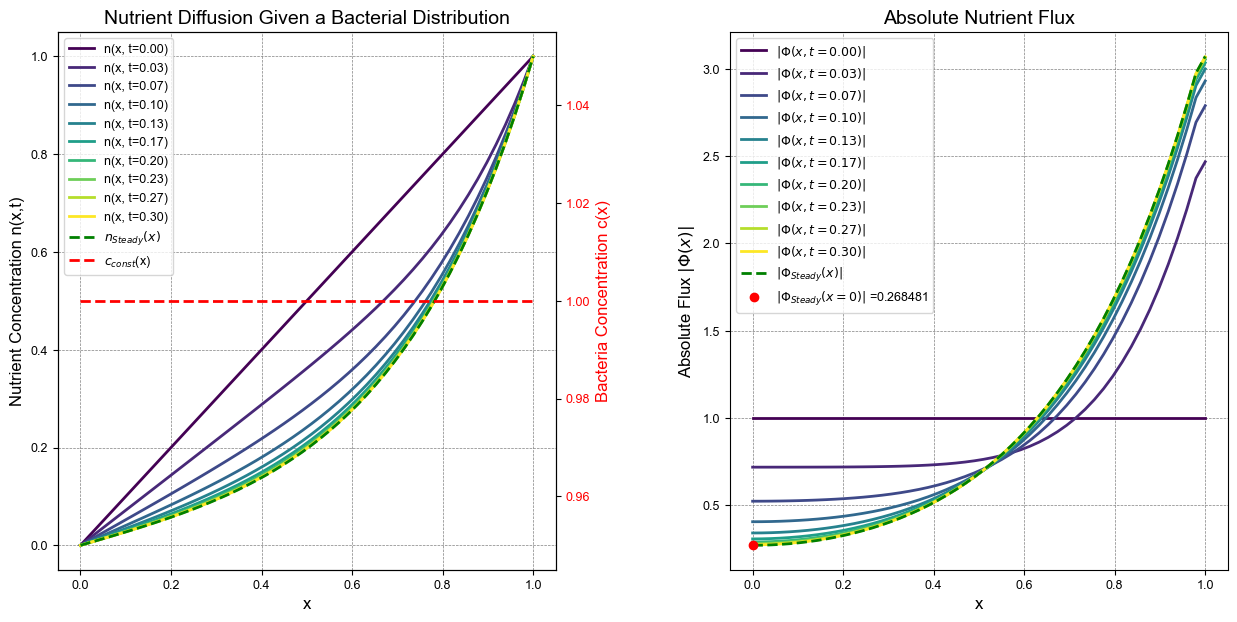

In [3]:
syst_params['Tc'] = 0.1
syst_params['T']  = 0.30

S1D = Solver1D(syst_params, c_const, n0_linear)
S1D.pde.solve()
S1D.ode.solve()
S1D.plot.double_plot()
S1D.plot.save(figures_path, "Diff_Dom")

### Comparable Timescales ($T_c \sim 1$) 📄

'../TFG_latex/Figures/Nutrients1D//Diff~Absorp.png'

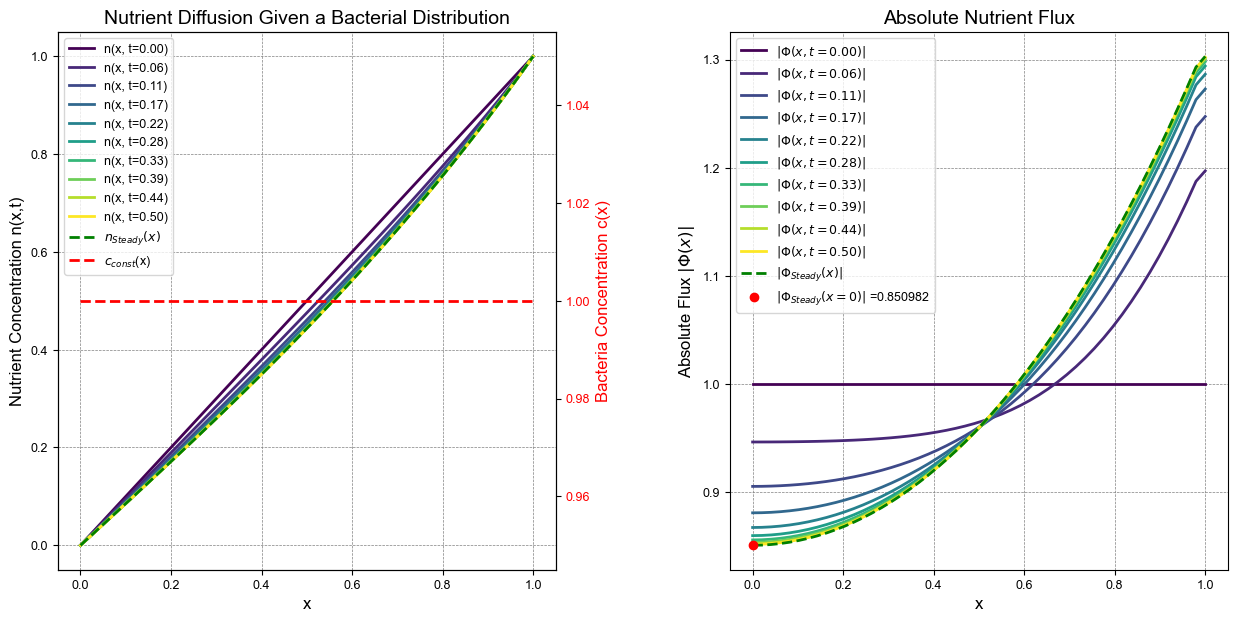

In [4]:
syst_params['Tc'] = 1
syst_params['T']  = 0.5

S1D = Solver1D(syst_params, c_const, n0_linear)
S1D.pde.solve()
S1D.ode.solve()
S1D.plot.double_plot()
S1D.plot.save(figures_path, "Diff~Absorp")

### Absorption Domination ($T_c \gg 1$) 📄

'../TFG_latex/Figures/Nutrients1D//Absorp_Dom.png'

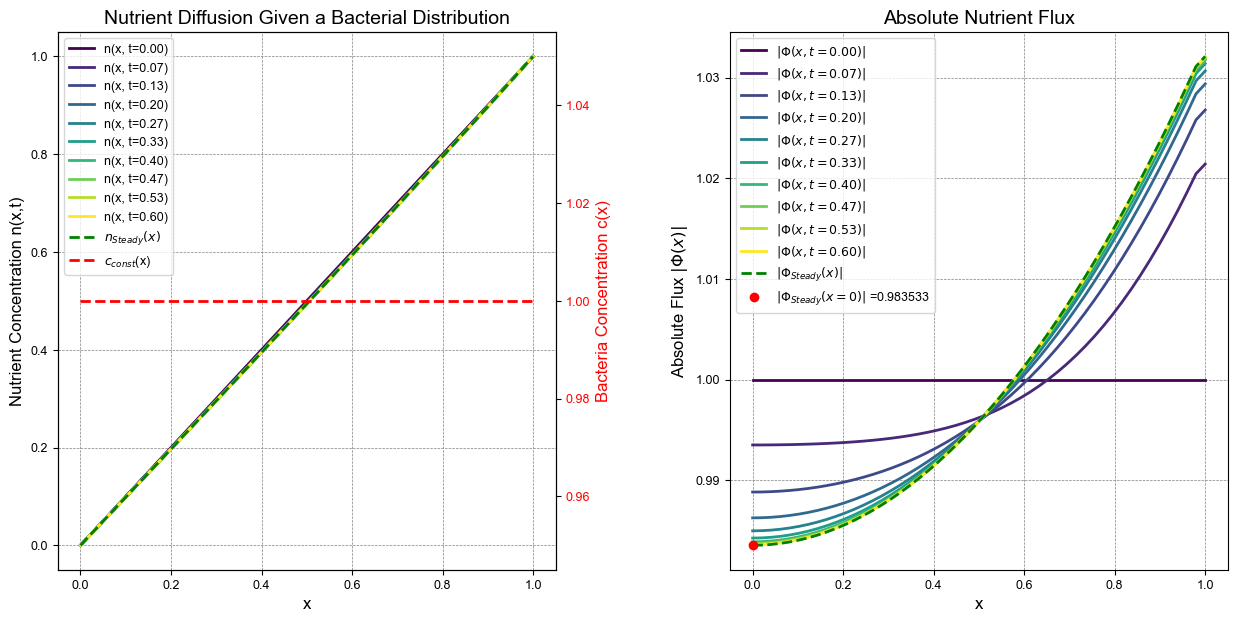

In [5]:
syst_params['Tc'] = 10
syst_params['T']  = 0.6

S1D = Solver1D(syst_params, c_const, n0_linear)
S1D.pde.solve()
S1D.ode.solve()
S1D.plot.double_plot()
S1D.plot.save(figures_path, "Absorp_Dom")

### Why Do Spurious Oscillations Appear?

Posible reasons?
- **Insufficient grid resolution**
  - Increasing grid resolution ❌
- **Non-smooth initial condition or boundary condition**
  - Using smoothed out $c(x)$ and $n (x,t=0)$ ❌
- **Choice of numerical scheme / Stability issues**
  - Try rescaling factors, avoid floating-point numbers (as: $\alpha = 1/10$)❓
- **Improving the numerical scheme for Stiff PDEs**
  - Change to the `Radau` method ✅ 